# Importing general packages, dataset, and providing a data description

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Clothing_Store.csv')

In [3]:
# Encoding Valid Phone Number variable numerically
dummies = pd.get_dummies(data[['VALPHON']],  drop_first=True)
data = data.join(dummies)
del data['VALPHON']

In [4]:
pd.set_option('max_columns', 51)
data.describe().round(3)

,HHKEY,ZIP_CODE,REC,FRE,MON,CC_CARD,AVRG,PC_CALC20,PSWEATERS,PKNIT_TOPS,PKNIT_DRES,PBLOUSES,PJACKETS,PCAR_PNTS,PCAS_PNTS,PSHIRTS,PDRESSES,PSUITS,POUTERWEAR,PJEWELRY,PFASHION,PLEGWEAR,PCOLLSPND,AMSPEND,PSSPEND,CCSPEND,AXSPEND,TMONSPEND,OMONSPEND,SMONSPEND,PREVPD,GMP,PROMOS,DAYS,FREDAYS,MARKDOWN,CLASSES,COUPONS,STYLES,STORES,STORELOY,WEB,MAILED,RESPONDED,RESPONSERATE,HI,LTFREDAY,CLUSTYPE,PERCRET,RESP,VALPHON_Y
count,2.174000e+04,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000
mean,9.955672e+12,48935.216,126.966,5.064,472.888,0.384,113.889,12.572,0.214,0.027,0.041,0.093,0.136,0.086,0.069,0.066,0.068,0.034,0.018,0.010,0.030,0.013,0.073,14.218,147.822,286.852,24.257,90.008,31.991,222.472,41.669,0.522,11.577,437.630,170.853,0.187,7.146,0.750,17.205,2.340,2116.290,0.042,4.673,1.194,17.277,37.889,80.240,15.107,0.131,0.166,0.860
std,5.195910e+08,24086.449,104.738,6.420,640.051,0.486,87.250,2.461,0.230,0.069,0.110,0.136,0.183,0.140,0.132,0.117,0.157,0.131,0.100,0.037,0.078,0.050,0.174,149.864,395.139,441.461,113.856,184.616,97.164,362.774,108.107,0.142,7.142,192.902,146.172,0.129,5.346,1.673,24.616,1.603,1806.105,0.200,3.547,1.829,24.543,28.150,78.730,12.214,0.557,0.372,0.347
min,9.955600e+12,0.000,1.000,1.000,0.990,0.000,0.490,11.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.010,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,1.000,1.000,3.000,0.000,0.000,0.000,0.000,0.050,0.090,0.000,0.000,0.000,0.000
25%,9.955616e+12,30339.000,35.000,1.000,135.605,0.000,60.990,11.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,78.000,0.000,0.000,0.000,0.000,0.000,0.460,5.000,287.000,67.000,0.090,3.000,0.000,5.000,1.000,337.000,0.000,1.000,0.000,0.000,18.410,24.958,5.000,0.000,0.000,1.000
50%,9.955628e+12,48335.000,98.000,3.000,263.490,0.000,92.070,11.000,0.160,0.000,0.000,0.050,0.040,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,147.600,0.000,0.000,0.000,108.000,0.000,0.550,12.000,447.000,124.000,0.180,6.000,0.000,9.000,2.000,1670.000,0.000,4.000,0.000,0.000,29.520,52.000,11.000,0.000,0.000,1.000
75%,9.955639e+12,66707.000,206.000,6.000,569.000,1.000,139.505,16.000,0.310,0.030,0.030,0.140,0.230,0.130,0.090,0.100,0.060,0.000,0.000,0.000,0.030,0.004,0.030,0.000,127.938,321.942,0.000,109.992,0.000,287.572,0.000,0.620,17.000,630.000,230.000,0.280,10.000,1.000,20.000,3.000,4176.000,0.000,8.000,2.000,30.000,50.000,107.000,22.000,0.090,0.000,1.000
max,9.964401e+12,99687.000,365.000,115.000,22511.490,1.000,1919.880,19.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,10642.720,11476.800,22511.490,4099.920,5562.460,2189.000,13224.070,2259.500,0.990,38.000,713.000,713.000,0.950,37.000,32.000,743.000,19.000,7504.000,1.000,11.000,11.000,100.000,200.000,364.000,50.000,40.920,1.000,1.000


### Grouping features by datatype for EDA below

In [5]:
y = ['RESP']

drop = ['HHKEY', 'PC_CALC20']
# customer id, unknown variable

categorical = ['ZIP_CODE', 'CLUSTYPE']
# zip code, market cluster

discrete = ['REC', 'FRE', 'PROMOS', 'DAYS', 'CLASSES', 'COUPONS', 'STYLES', 'STORES', 'MAILED', 'RESPONDED', 'STORELOY']
# visits, purchase visits, promos on file, days on file,
# diff product classes purchased, coupons used by cust, diff styles purchased,
# stores cust has shopped in, promos mailed in last yr promos responded in last yr

binary = ['CC_CARD', 'VALPHON_Y', 'WEB']
# CC owned, valid phone number on file, shopped on web

continuous = ['MON', 'AVRG', 'TMONSPEND', 'OMONSPEND', 'SMONSPEND', 'PREVPD', 'FREDAYS', 'LTFREDAY',
              'AMSPEND', 'PSSPEND', 'CCSPEND', 'AXSPEND']
# total spent, average spent per visit, three month, one month, six month, amt spent in same period last yr,
# days between purchases in last yr, days between purchases over lifetime
# amount spent at each franchise (x4)

fractions = ['GMP', 'MARKDOWN', 'RESPONSERATE', 'HI', 'PERCRET',
             'PSWEATERS', 'PKNIT_TOPS', 'PKNIT_DRES', 'PBLOUSES',
             'PJACKETS', 'PCAR_PNTS', 'PCAS_PNTS', 'PSHIRTS', 'PDRESSES', 'PSUITS',
             'POUTERWEAR', 'PJEWELRY', 'PFASHION', 'PLEGWEAR', 'PCOLLSPND']
# gross margin percentage, markdown percentage of customer purchases, 0-100% promotion response rate,
# product uniformity (low is spending diversity), percent of returns
# items x15

# Preliminary EDA

In [6]:
# Percentage of Responces
data['RESP'].value_counts(normalize=True).round(3)

0    0.834
1    0.166
Name: RESP, dtype: float64

In [7]:
# Testing for skewness in all features (aware that you can't test skewness in binary)
import scipy

columns = list(data.columns)

skewed = []
non_skewed = []

for i in columns:
    p = scipy.stats.skewtest(data[i], nan_policy='omit')[1] # calculates p_value (H0 = sample is from normally distributed pop)
    if p < 0.01:
        skewed.append(i)
    else:
        non_skewed.append(i)

non_skewed

['ZIP_CODE']

*Looks like everything is skewed...*

In [8]:
# Missing data
missing_data = data.isnull().sum(axis=0).reset_index()
missing_data.columns = ['Predictor', 'Count of NaN values']
missing_data['Missing Ratio'] = missing_data['Count of NaN values'] / data.shape[0]
missing_data.loc[missing_data['Missing Ratio'] > 0]

,Predictor,Count of NaN values,Missing Ratio


*NO MISSING DATA - YAY!*

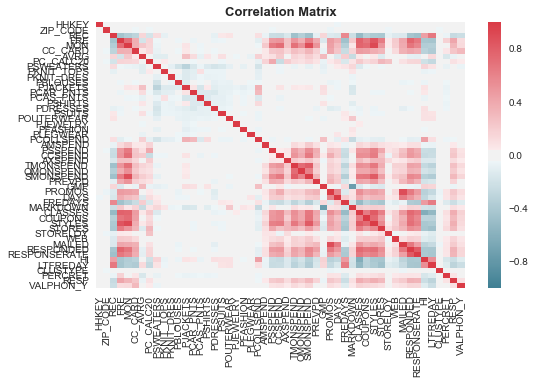

In [9]:
# Correlation matrix
fig, ax = plt.subplots()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data.corr(), ax=ax, cmap=cmap)
ax.set_title('Correlation Matrix', fontweight='bold', fontsize=13)

plt.tight_layout()
plt.show()

In [10]:
# Lists correlation pairs with absolute value of 0.75 or greater
columns = list(data.columns)
corr = pd.DataFrame(data.corr()) # Below requires correlation values in a table

high_corr = np.where(np.abs(corr) >= 0.75) # Chose 0.75 arbitrarily
high_corr = [(corr.columns[x], corr.columns[y]) for x, y in zip(*high_corr) if x != y and x < y]

high_corr

[('FRE', 'CLASSES'),
 ('FRE', 'STYLES'),
 ('FRE', 'RESPONDED'),
 ('MON', 'SMONSPEND'),
 ('MON', 'CLASSES'),
 ('MON', 'STYLES'),
 ('TMONSPEND', 'SMONSPEND'),
 ('SMONSPEND', 'STYLES'),
 ('GMP', 'MARKDOWN'),
 ('PROMOS', 'MAILED'),
 ('CLASSES', 'STYLES'),
 ('RESPONDED', 'RESPONSERATE')]

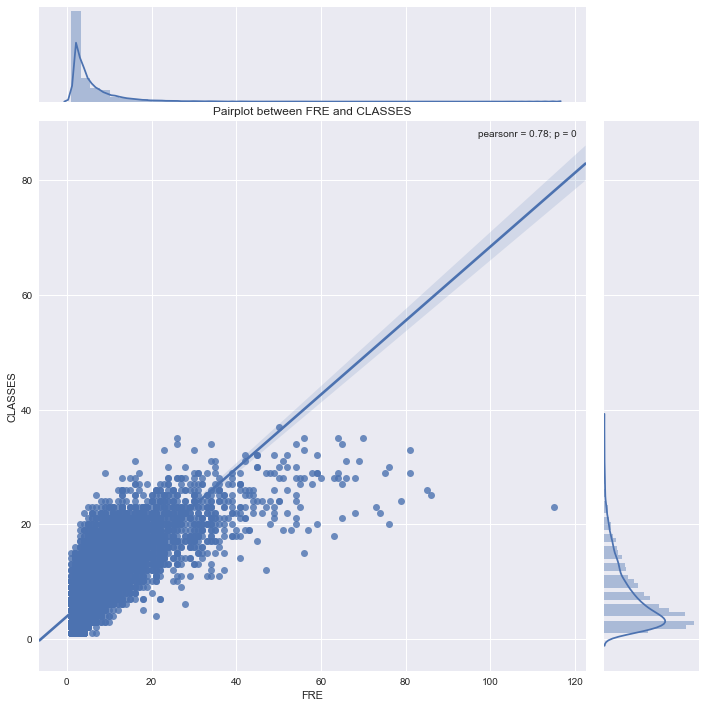

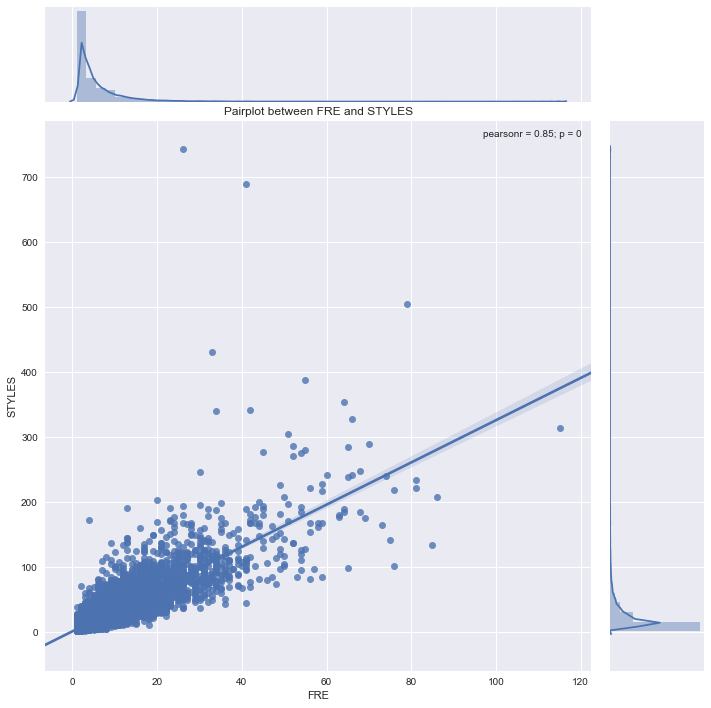

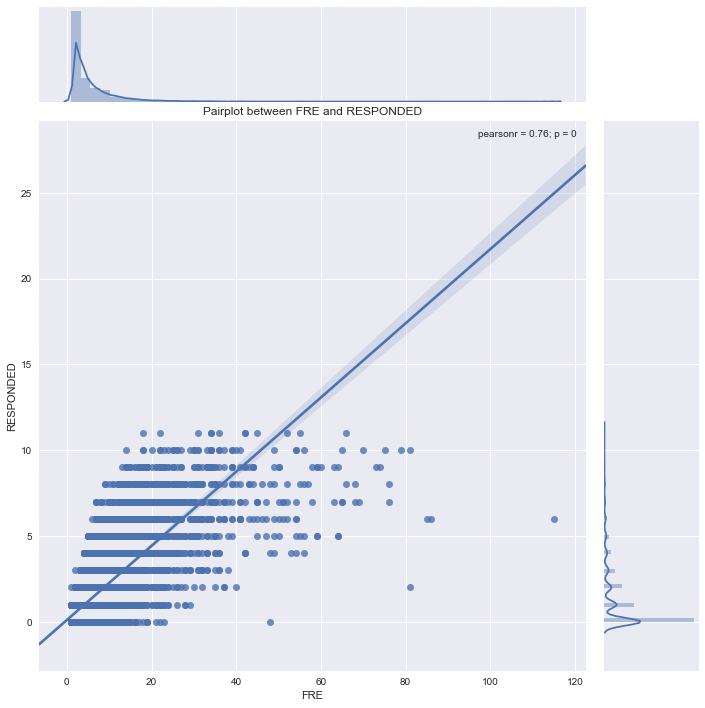

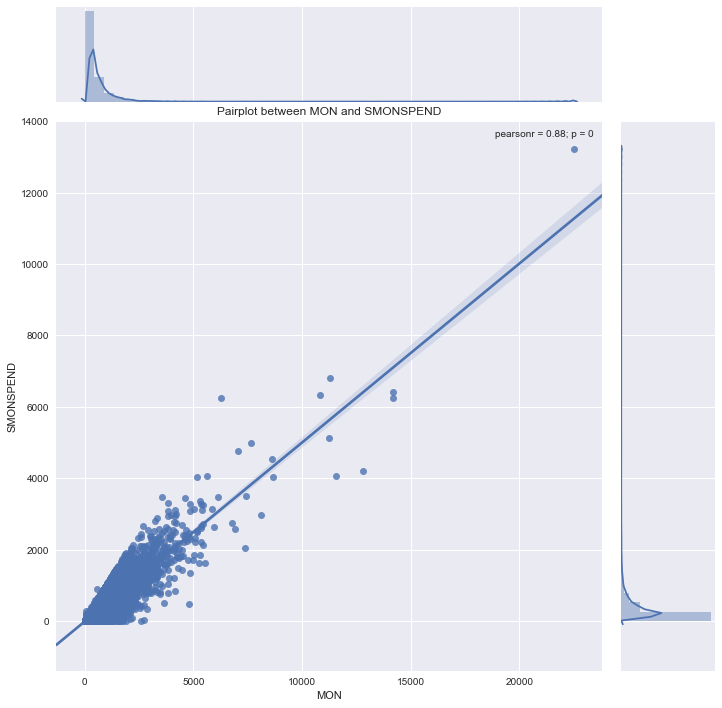

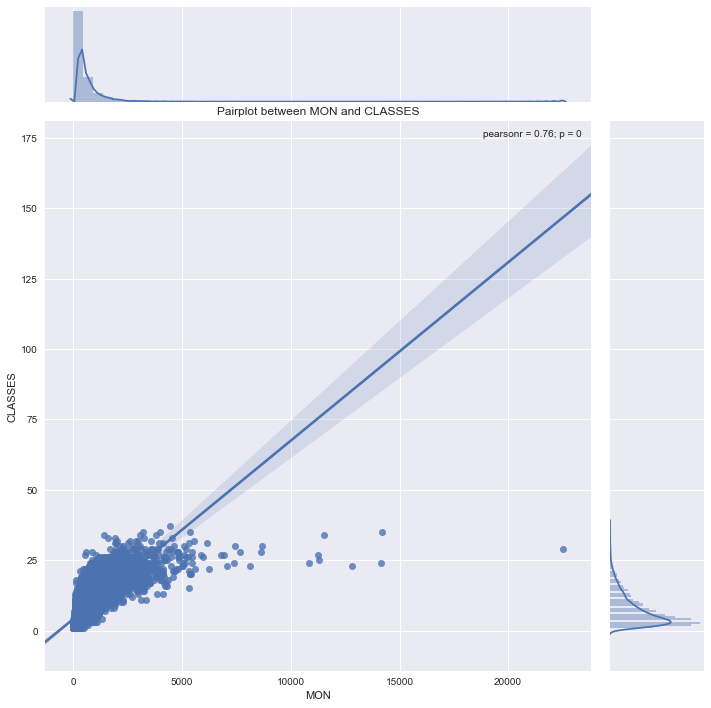

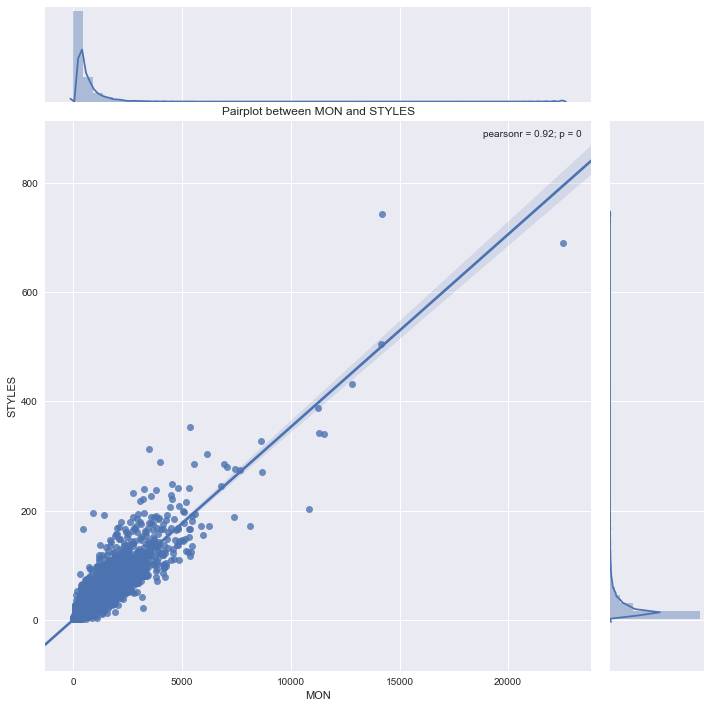

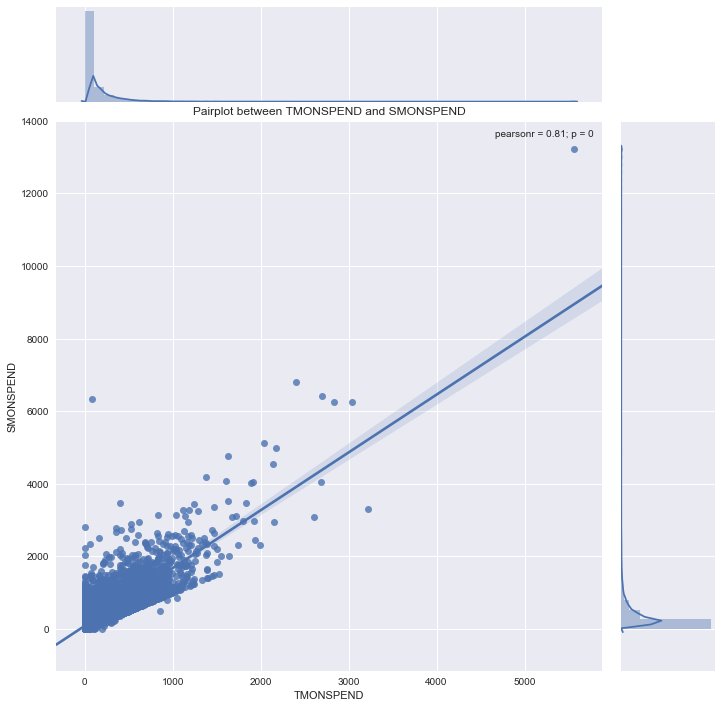

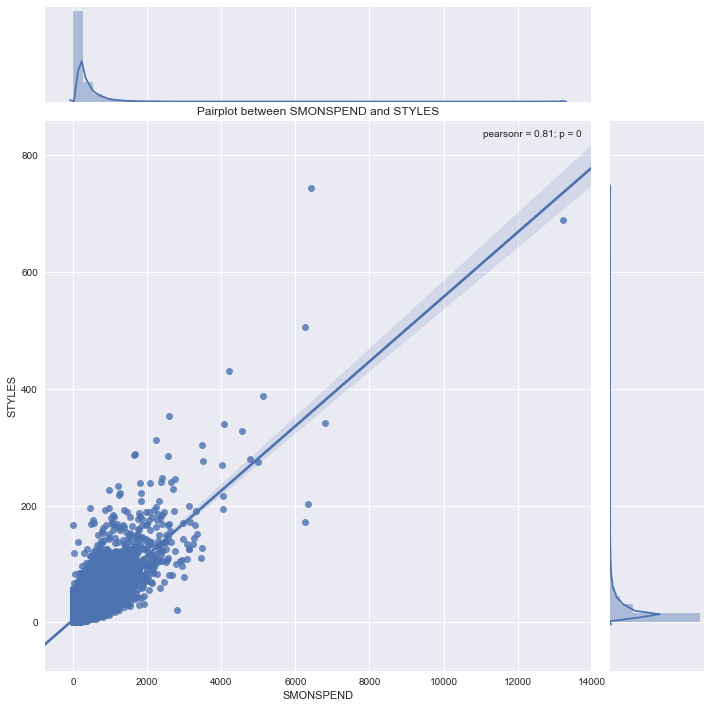

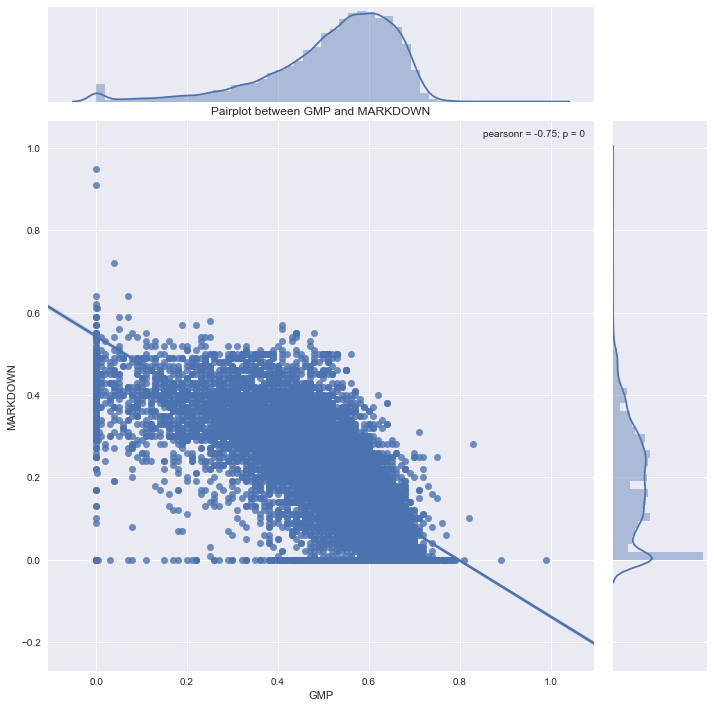

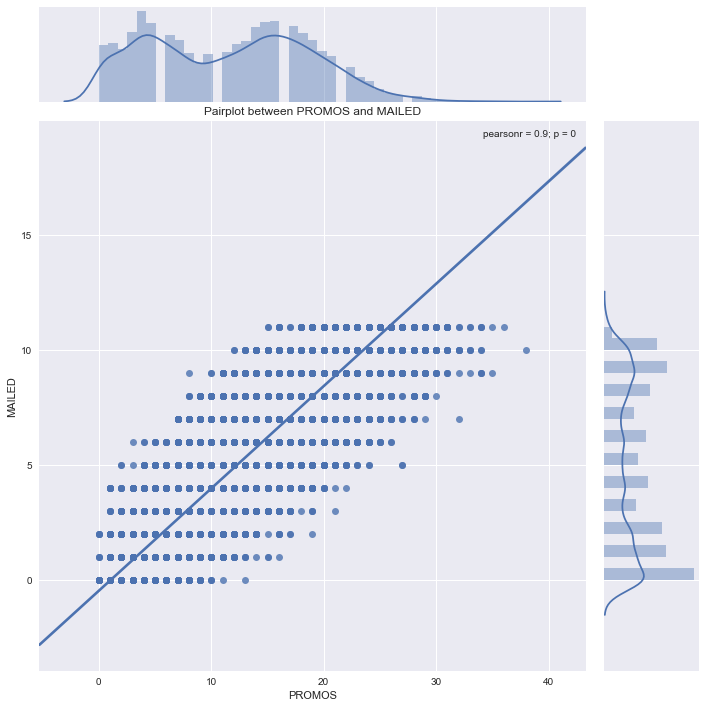

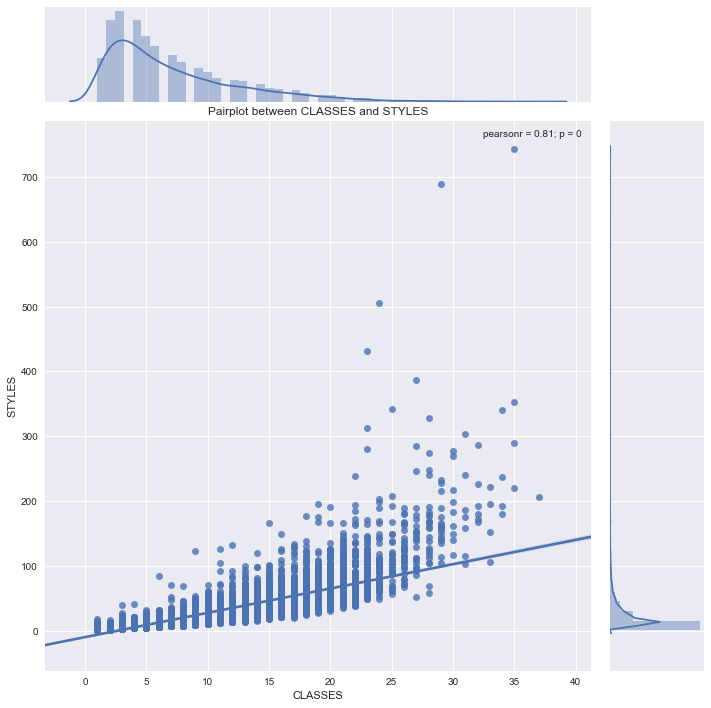

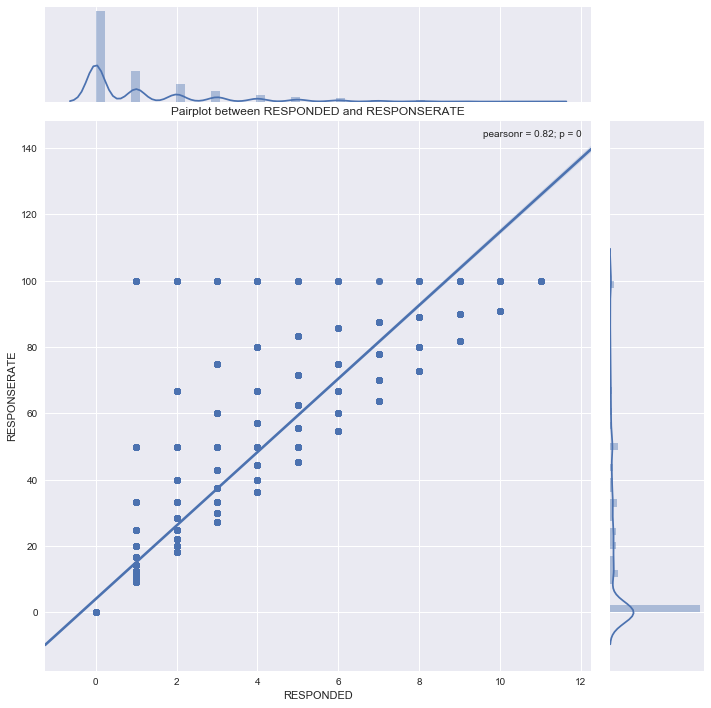

In [11]:
# Pairplots for high correlation pairs (based on above)
for i in high_corr:
    fig = sns.jointplot(x=data[i[0]], y=data[i[1]], kind='reg', size=10)
    sns.plt.title('Pairplot between ' + str(i[0]) + ' and ' + str(i[1]))
    plt.show()

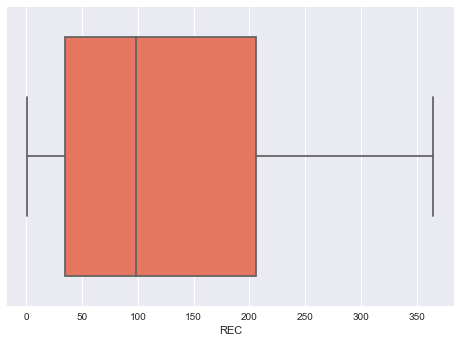

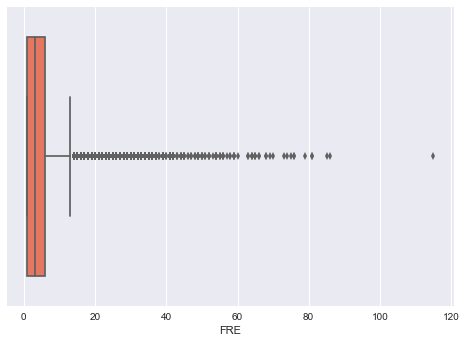

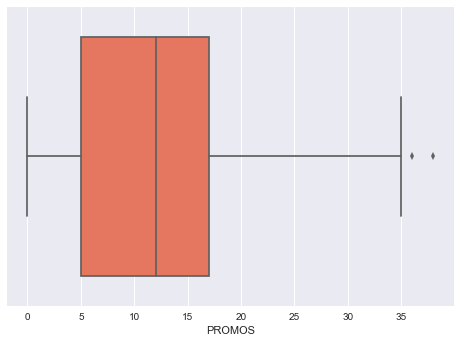

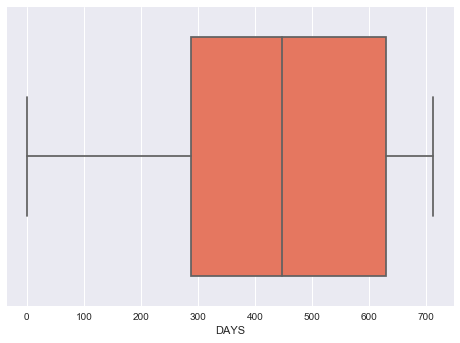

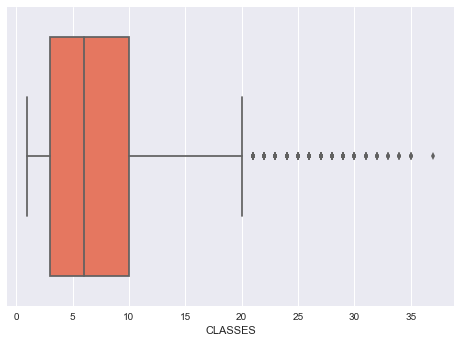

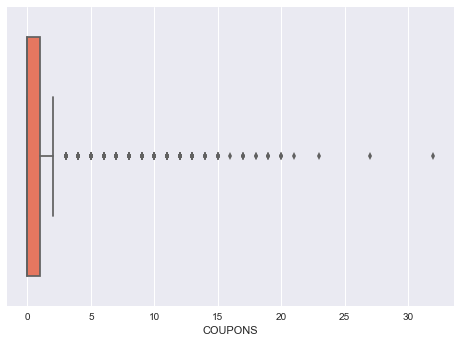

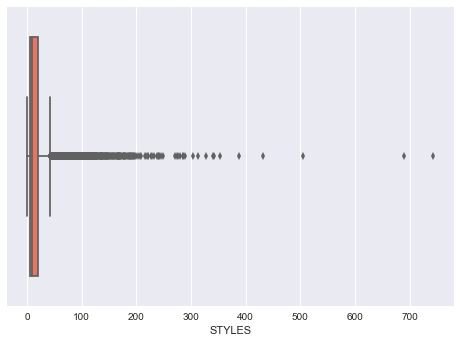

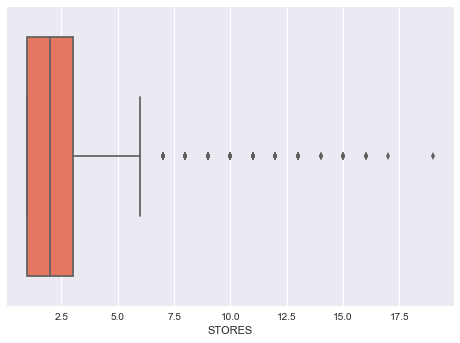

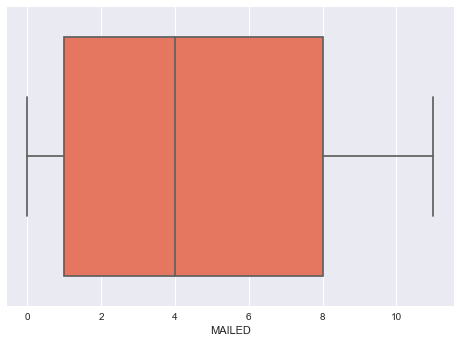

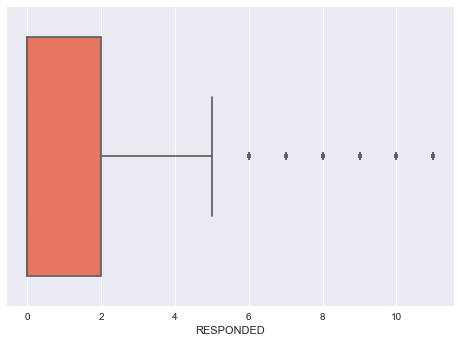

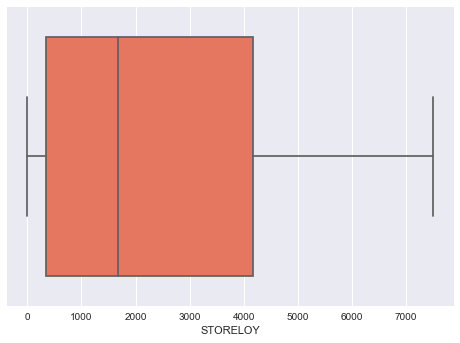

In [12]:
# Boxplot for discrete variables
for i in discrete: 
    fig, ax = plt.subplots()
    sns.boxplot(x=i, data=data, orient='h', palette='Reds')
    plt.show()

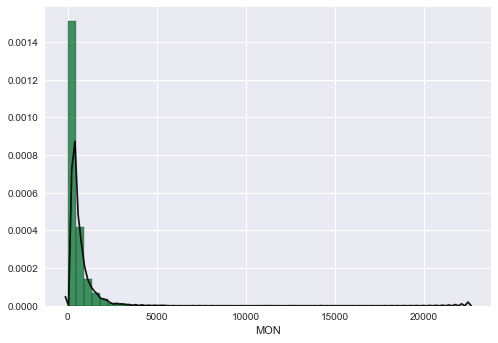

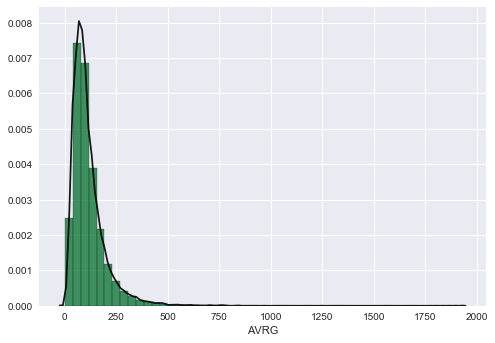

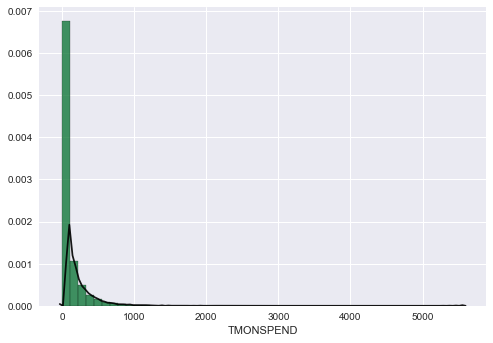

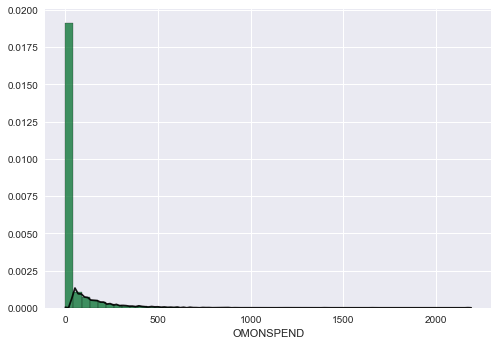

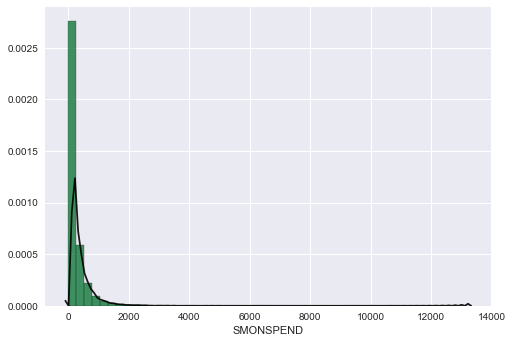

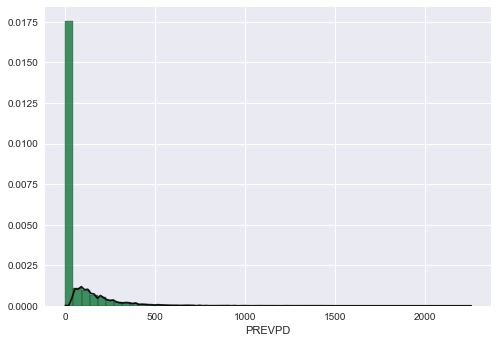

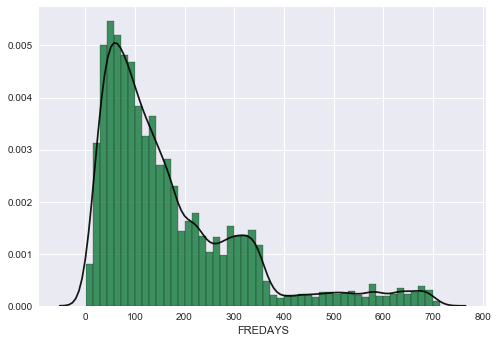

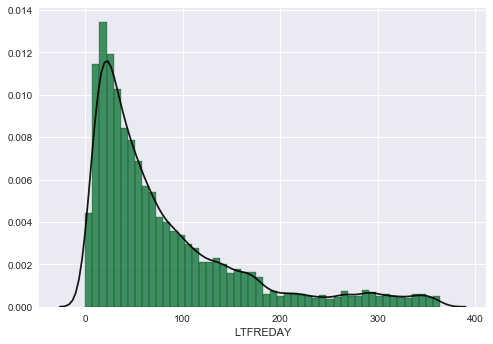

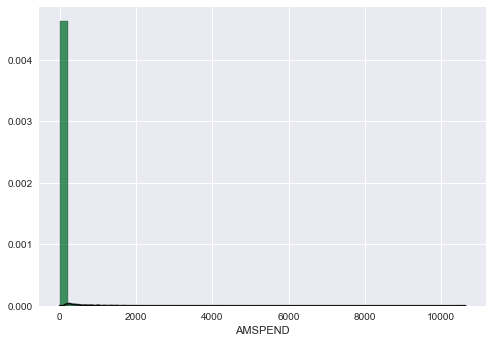

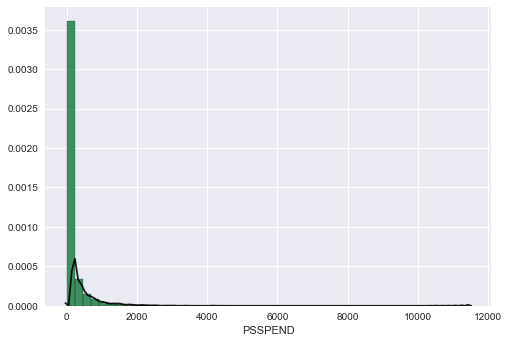

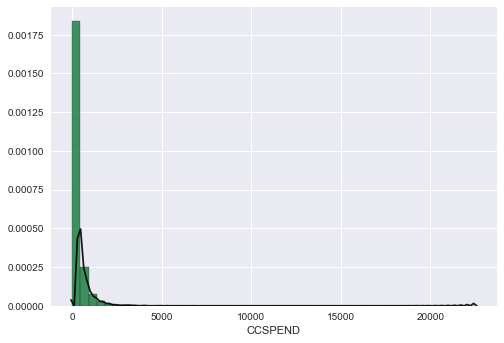

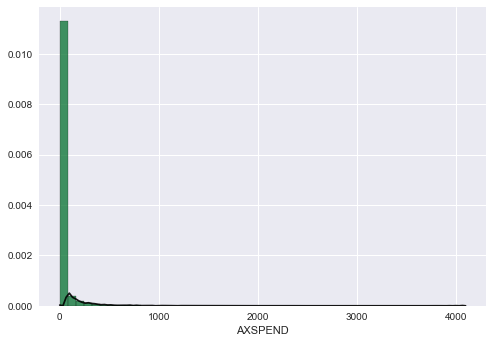

In [13]:
# Histogram for continuous variables
def hist(series):
    fig, ax = plt.subplots()
    sns.distplot(series, ax=ax,
                 hist_kws={'alpha': 0.75,
                           'edgecolor':'black',
                           'color': sns.color_palette('Greens')[-1]},  
                 kde_kws={'color': 'black', 'alpha': 0.9})
    return plt.show()

for i in continuous:
    hist(data[i])

*Several variables seem to have outliers - will need to be addressed for the report*

In [14]:
pivot = pd.pivot_table(data, values=['FRE','DAYS','RESPONDED'], columns='CLUSTYPE')
pivot.round(3)

CLUSTYPE,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
DAYS,419.143,450.339,451.590,445.973,448.295,441.656,438.805,437.306,441.675,458.207,446.103,436.917,425.479,412.925,420.468,435.187,437.782,389.260,435.463,405.778,443.275,406.087,453.094,428.074,437.203,444.786,433.615,432.429,424.467,405.859,418.861,473.150,413.437,485.333,408.382,415.493,432.548,406.478,424.025,447.908,402.005,421.202,402.405,404.419,426.00,398.218,445.695,410.24,421.32,400.250,429.452
FRE,4.857,5.144,5.888,5.242,5.099,5.339,4.700,4.553,4.933,3.862,5.319,5.037,4.576,5.088,4.064,5.420,4.919,4.745,5.306,7.444,4.612,4.609,5.112,5.089,4.735,5.276,4.154,5.857,4.389,3.766,4.322,4.300,5.346,4.333,4.091,5.458,6.161,4.507,4.808,5.956,4.422,4.828,4.091,3.710,1.25,4.750,5.298,2.52,3.92,2.812,5.195
RESPONDED,1.029,1.254,1.478,1.269,1.286,1.246,1.142,1.041,1.159,1.103,1.313,1.229,1.042,1.088,0.737,1.198,1.187,1.000,1.274,1.444,1.092,0.739,1.133,1.261,0.986,1.196,0.846,1.095,0.977,0.781,0.957,1.075,1.078,1.667,1.000,1.206,1.161,0.970,1.041,1.480,0.843,1.141,0.950,0.677,0.00,1.016,1.156,0.52,0.96,0.375,1.175


In [15]:
crosstab = pd.crosstab(data['RESP'],data['RESPONDED'])
crosstab

RESPONDED,0,1,2,3,4,5,6,7,8,9,10,11
RESP,,,,,,,,,,,,
0,10816,3300,1754,925,560,373,204,96,58,29,12,2
1,894,613,518,455,345,262,200,139,92,55,28,10


In [16]:
crosstab = (crosstab/crosstab.sum()).round(3)
crosstab

RESPONDED,0,1,2,3,4,5,6,7,8,9,10,11
RESP,,,,,,,,,,,,
0,0.924,0.843,0.772,0.67,0.619,0.587,0.505,0.409,0.387,0.345,0.3,0.167
1,0.076,0.157,0.228,0.33,0.381,0.413,0.495,0.591,0.613,0.655,0.7,0.833


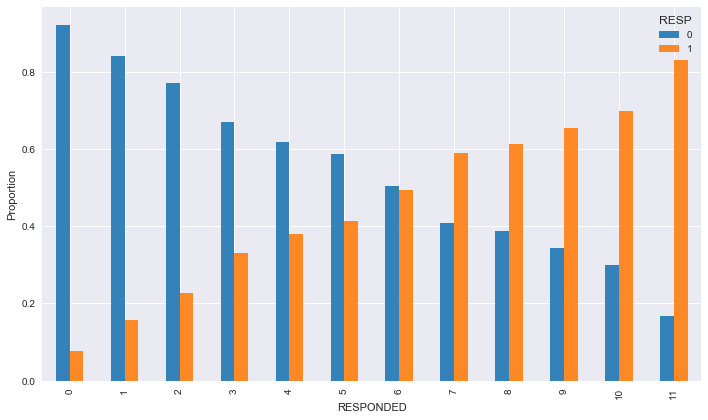

In [17]:
colours=['#1F77B4', '#FF7F0E']

fig, ax = plt.subplots(figsize=(10,6))
(crosstab.T).plot(kind='bar', alpha=0.9, color=colours, ax=ax)
ax.set_xlabel('RESPONDED')
ax.set_ylabel('Proportion')
ax.legend_.set_title('RESP')
plt.tight_layout()
sns.despine()
plt.show()

## Further Tests for EDA

In [18]:
data['ZIP_CODE'].value_counts().head()

55125    51
15601    42
62301    38
60089    38
60187    36
Name: ZIP_CODE, dtype: int64

__*Drop zip code, nothing really possible.. except binning.. no patterns really found, and far too many single observations for a zipcode*__

In [19]:
data['CLUSTYPE'].value_counts().head(10)

10    2623
1     2054
4     1719
16    1431
8     1094
15    1002
11     964
18     938
5      931
38     873
Name: CLUSTYPE, dtype: int64

__*Consider encoding first 9, and 10th as Other*__

In [20]:
from scipy import stats

# Non-parametric Kruskal-Wallis ANOVA rank test - discrete variables
H = []
p = []

for i in discrete:
    h, pval = stats.kruskal(*[data.loc[data[i]==v,'RESP'] for v in data[i].unique()])
    H.append(h)
    p.append(pval)

# Calculates significance at 1% and appends results
test_results = []
for value in p:
    if value < 0.01:
        test_results.append('True')
    else:
        test_results.append('False')

# Creates tables with the values above
table = pd.DataFrame(H, columns = ['H Stat'], index = discrete)
table['p values'] = pd.DataFrame(p, index = discrete)
table['Reject, \u03b1=0.01'] = pd.DataFrame(test_results, index = discrete)

table.round(2)

,H Stat,p values,"Reject, α=0.01"
REC,2202.13,0.0,True
FRE,4096.08,0.0,True
PROMOS,1313.31,0.0,True
DAYS,1600.12,0.0,True
CLASSES,3077.12,0.0,True
COUPONS,2395.66,0.0,True
STYLES,3820.81,0.0,True
STORES,2042.75,0.0,True
MAILED,1093.56,0.0,True
RESPONDED,2698.85,0.0,True


In [21]:
# Same test as above, for binary and categorical variables
H = []
p = []

for i in binary:
    h, pval = stats.kruskal(*[data.loc[data[i]==v,'RESP'] for v in data[i].unique()])
    H.append(h)
    p.append(pval)

test_results = []
for value in p:
    if value < 0.01:
        test_results.append('True')
    else:
        test_results.append('False')

table = pd.DataFrame(H, columns = ['H Stat'], index = binary)
table['p values'] = pd.DataFrame(p, index = binary)
table['Reject, \u03b1=0.01'] = pd.DataFrame(test_results, index = binary)

table.round(2)

,H Stat,p values,"Reject, α=0.01"
CC_CARD,1265.24,0.0,True
VALPHON_Y,236.33,0.0,True
WEB,555.28,0.0,True


* *Tests all class for H0: all medians are equal and H1: one or more medians are not equal, between response being 0 or 1*
* *Non-parametric required due to skewness in most variables*

**Results**
* *Looks like there isn't significant evidence to reject H0 that medians are different for zip_code or cluster type in determining response - but this could be due to how many classes there are too*

**Notes for the test**
- The conditional distribution of the dependent variables conditional on each class is the same, except for possible variation in medians
- The observations are independent
- The response data can be ordered

In [23]:
# Variance Inflation Factor calculations for multicollinearity - excluding binary (bc it doesn't work)
from statsmodels.stats.outliers_influence import variance_inflation_factor

pred = discrete + continuous + fractions

X = data[pred].as_matrix()
VIF = pd.DataFrame([np.sqrt(variance_inflation_factor(X,j)) for j in range(len(pred))], index=pred, columns=['SQRT(VIF)'])

VIF.sort_values(by='SQRT(VIF)', ascending=False).round(2)

,SQRT(VIF)
MON,167.34
CCSPEND,110.65
PSSPEND,88.71
AMSPEND,31.66
AXSPEND,24.49
GMP,5.05
STYLES,4.89
PROMOS,4.71
MAILED,4.37
DAYS,4.28


<h3>**Further Analysis**</h3>

Consider: working out how to analyse continuous data bounded between 0-1 (i.e. the fractional data)

# Feature engineering

### Transformations
*Can be run for all continuous and discrete*

In [24]:
data['LOG_MON'] = np.log(data['MON'])
data['POWER_MON'] = scipy.stats.boxcox(data['MON'])[0]

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


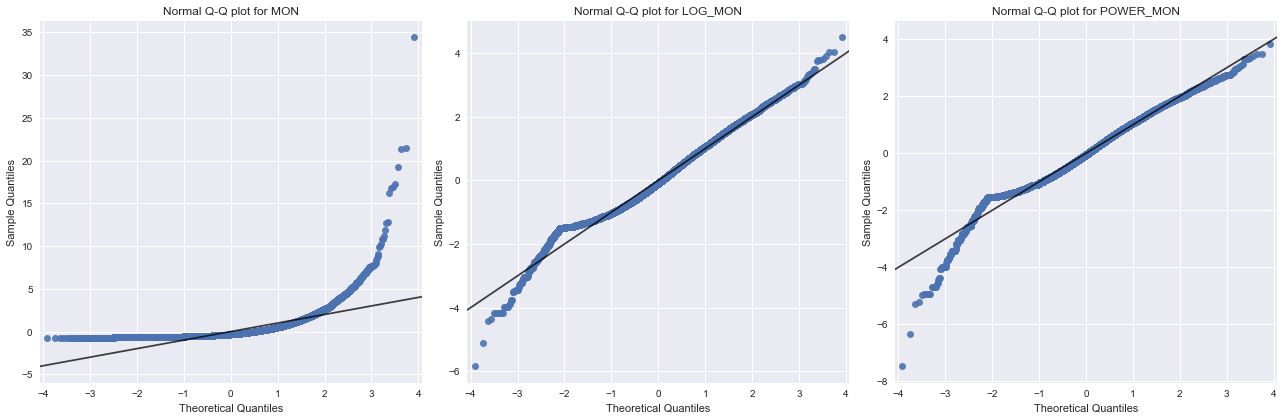

In [25]:
# Comparison of the original and two transformed series on Q-Q plot
import statsmodels.api as sm

label = ['MON', 'LOG_MON', 'POWER_MON']

fig, ax = plt.subplots(1,3, figsize=(18,6))
i=0
for series in label:
    pp = sm.ProbPlot(data[series], fit=True)
    qq = pp.qqplot(color=sns.color_palette()[0], alpha=0.9, ax=ax[i])
    a = ax[i].get_xlim()[0]
    b = ax[i].get_xlim()[1]
    ax[i].plot([a,b],[a,b], color='black', alpha=0.75)
    ax[i].set_xlim(a,b)
    ax[i].set_title('Normal Q-Q plot for {}'.format(series))
    i+=1

plt.tight_layout()
plt.show()

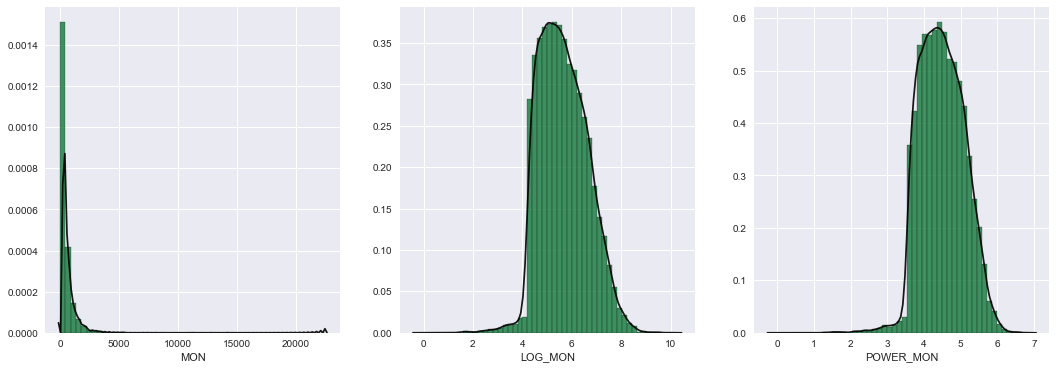

In [26]:
# Comparison of the original and two transformed series
label = ['MON', 'LOG_MON', 'POWER_MON']

fig, ax = plt.subplots(1,3, figsize=(18,6))
i=0
for series in label:
    sns.distplot(data[series], ax=ax[i],
             hist_kws={'alpha': 0.75, 'edgecolor':'black', 'color': sns.color_palette('Greens')[-1]},
                 kde_kws={'color': 'black', 'alpha': 0.9})
    i+=1

plt.show()

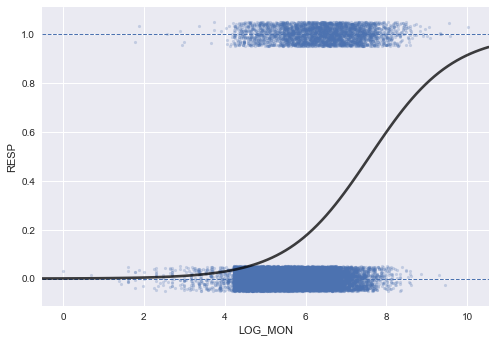

In [27]:
# Plotting the transformed money spent against response with Logit
fig, ax = plt.subplots()

ax.axhline(0.0, linestyle='--', linewidth=1)
ax.axhline(1.0, linestyle='--', linewidth=1)

sns.regplot(data['LOG_MON'], data['RESP'], ax=ax, ci=None, logistic=True, y_jitter=0.05, 
            scatter_kws={'s': 10, 'alpha': 0.25}, line_kws={'alpha': 0.75, 'color': 'black'})

ax.set_xlabel('LOG_MON')
ax.set_ylabel('RESP')

plt.show()

### Categorical encoding

In [9]:
data.loc[data['CLUSTYPE'] == 10, 'CLUSTYPE'] = 'Ten'
data.loc[data['CLUSTYPE'] == 1, 'CLUSTYPE'] = 'One'
data.loc[data['CLUSTYPE'] == 4, 'CLUSTYPE'] = 'Four'
data.loc[data['CLUSTYPE'] == 16, 'CLUSTYPE'] = 'Sixteen'
data.loc[data['CLUSTYPE'] == 8, 'CLUSTYPE'] = 'Eight'
data.loc[data['CLUSTYPE'] == 15, 'CLUSTYPE'] = 'Fifteen'
data.loc[data['CLUSTYPE'] == 11, 'CLUSTYPE'] = 'Eleven'
data.loc[data['CLUSTYPE'] == 18, 'CLUSTYPE'] = 'Eighteen'
data.loc[data['CLUSTYPE'] == 5, 'CLUSTYPE'] = 'Five'

# Chosen from top 9 most frequent cluster types, remainder will be combined into Other

clus = [10, 1, 4, 16, 8, 15, 11, 18, 5]
for i in range(0,51):
    if i not in clus:
        data.loc[data['CLUSTYPE'] == i, 'CLUSTYPE'] = 'Other'

In [10]:
dummies = pd.get_dummies(data[['CLUSTYPE']], drop_first=True)
data = data.join(dummies)
del data['CLUSTYPE']

### Interactions

In [11]:
# Creating interactions
data['I1'] = data['CC_CARD'] * data['MON'] # credit card owned : spent
data['I2'] = data['WEB'] * data['MON'] # web shopper : spent
# VALPHON not used due to ANOVA test suggesting no difference in class medians

data['I3'] = data['PROMOS'] * data['MON'] # promos used : spent
data['I4'] = data['CLASSES'] * data['MON'] # classes purchased : spent
data['I5'] = data['COUPONS'] * data['MON'] # coupons used : spent
data['I6'] = data['RESPONDED'] * data['MON'] # mail promo responses : spent

data['I7'] = data['MAILED'] * data['FREDAYS'] # mailed : frequency between visits

# could also consider 'TMONSPEND', 'OMONSPEND', 'SMONSPEND'

**Notes**

*These interactions were chosen on the basis of:*
* *Binary variables CC_CARD and WEB potentially changing how much money you would spend in store*
* *Number of promos (discrete) on file and amount spent*
* *rational for differnet classes purchased and amount spent = more diverse spending maybe? so more money spent*
* *Number of coupons (discrete) used and amount spent*
* *Number of mail promos responded to (discrete) and amount spent*

### Dropping predictors

In [12]:
response = ['RESP']
drop = ['HHKEY', 'PC_CALC20', 'AMSPEND', 'PSSPEND', 'CCSPEND', 'AXSPEND', 'ZIP_CODE']
# dropped the customer id and pc_calc (unknown), as well as spend variables due to multicollinearity
# zip_code dropped following EDA - way too many classes (could bin it potentially though)

exclude = response + drop

predictors = [x for x in list(data.columns) if x not in exclude]

### Scaling

In [13]:
# Scaling all variables (could consider robust scaling, but won't bother due to past experience in performance deterioration)
# Should just apply to the continuous... but following Marcel's Tutorial 5 notebook
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(data[predictors])
data_scale = scaler.transform(data[predictors])
data_scale = pd.DataFrame(data_scale, columns=predictors)

In [14]:
data = data[['RESP']].join(data_scale)
data.head()

,RESP,REC,FRE,MON,CC_CARD,AVRG,PSWEATERS,PKNIT_TOPS,PKNIT_DRES,PBLOUSES,PJACKETS,PCAR_PNTS,PCAS_PNTS,PSHIRTS,PDRESSES,PSUITS,POUTERWEAR,PJEWELRY,PFASHION,PLEGWEAR,PCOLLSPND,TMONSPEND,OMONSPEND,SMONSPEND,PREVPD,...,STORELOY,WEB,MAILED,RESPONDED,RESPONSERATE,HI,LTFREDAY,PERCRET,VALPHON_Y,CLUSTYPE_Eighteen,CLUSTYPE_Eleven,CLUSTYPE_Fifteen,CLUSTYPE_Five,CLUSTYPE_Four,CLUSTYPE_One,CLUSTYPE_Other,CLUSTYPE_Sixteen,CLUSTYPE_Ten,I1,I2,I3,I4,I5,I6,I7
0,0,0.773700,-0.477282,-0.163160,-0.789146,0.806220,-0.146231,-0.395695,-0.375769,1.513790,-0.741588,1.170639,-0.523220,1.058601,-0.435927,-0.260588,-0.184123,-0.264446,-0.125124,0.349508,1.247541,-0.487554,-0.329251,-0.613265,-0.385449,...,-1.167893,-0.208174,0.092266,-0.652634,-0.703948,-0.215956,0.390710,-0.234545,-2.474038,-0.212348,-0.215406,-0.219812,-0.211519,-0.293019,-0.323014,-0.839223,-0.265446,2.699670,-0.451234,-0.140699,-0.079255,-0.176712,-0.099736,-0.295648,0.912394
1,1,-1.154972,-0.165762,-0.335744,1.267193,-0.566079,0.201265,1.935082,-0.375769,-0.685228,-0.741588,0.670965,0.534007,-0.567190,0.711379,-0.260588,-0.184123,-0.264446,-0.380808,0.147894,1.706758,0.259961,0.247006,0.097937,-0.385449,...,-1.167893,-0.208174,-0.189654,0.440916,1.333331,-0.183628,-0.466668,-0.180661,0.404197,-0.212348,-0.215406,-0.219812,-0.211519,-0.293019,-0.323014,-0.839223,-0.265446,2.699670,-0.053597,-0.140699,-0.249544,-0.294297,-0.147524,-0.183381,-0.069074
2,0,1.909897,-0.477282,-0.618540,-0.789146,-0.864080,3.415599,-0.395695,-0.375769,-0.685228,-0.741588,-0.613911,-0.523220,-0.567190,-0.435927,-0.260588,-0.184123,-0.264446,-0.380808,-0.255333,-0.417120,-0.487554,-0.329251,-0.613265,-0.024686,...,-1.167893,-0.208174,-0.189654,-0.652634,-0.703948,2.206492,-0.147850,-0.234545,-2.474038,-0.212348,-0.215406,-0.219812,-0.211519,-0.293019,-0.323014,-0.839223,3.767250,-0.370416,-0.451234,-0.140699,-0.432046,-0.392121,-0.147524,-0.295648,-0.079202
3,0,-0.582099,0.457278,0.583048,1.267193,-0.093287,0.722508,-0.395695,0.079211,-0.245424,0.352398,0.599583,-0.523220,-0.139350,-0.435927,-0.260588,-0.184123,-0.120514,0.002718,-0.053720,-0.417120,0.080882,-0.329251,0.417344,1.152421,...,-1.167893,-0.208174,1.219944,2.628015,2.012559,-0.519339,-0.676757,-0.234545,0.404197,-0.212348,-0.215406,-0.219812,-0.211519,-0.293019,-0.323014,-0.839223,-0.265446,2.699670,0.852737,-0.140699,0.822439,0.446725,0.181672,0.808832,0.024697
4,0,-0.744413,-0.633042,-0.602229,-0.789146,-0.303149,-0.059357,2.517776,-0.375769,-0.685228,-0.741588,-0.613911,2.572946,-0.567190,-0.435927,-0.260588,-0.184123,4.346165,-0.380808,-0.255333,-0.417120,-0.013911,-0.329251,-0.372228,-0.385449,...,-1.167893,-0.208174,-1.317333,-0.652634,-0.703948,-0.332833,-0.708004,-0.234545,0.404197,-0.212348,-0.215406,-0.219812,-0.211519,-0.293019,-0.323014,1.191578,-0.265446,-0.370416,-0.451234,-0.140699,-0.481492,-0.373982,-0.147524,-0.295648,-0.774029


# Re-running models

In [15]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import model_selection
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import preprocessing
from sklearn.cross_validation import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

#Stop warnings
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
final_train = data.sample(frac=0.6, random_state=450411920)
final_test = data[data.index.isin(final_train.index)==False]
y_train = final_train.pop('RESP')
y_test = final_test.pop('RESP')

In [17]:
#In order to store the results from our models
pred = []
method = []
model = []

In [18]:
#KNN
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(final_train,y_train)
predneigh = neigh.predict(final_test)
pred.append(predneigh)
method.append('KNN')

In [19]:
#Adaptive Boosting
regr = AdaBoostClassifier(learning_rate = 1, n_estimators = 350)
model.append(regr)
regr = regr.fit(final_train,y_train)
adapred = regr.predict(final_test)
pred.append(adapred)
method.append('AdaptiveBoost')

In [20]:
#Quadratic Discriminant analysis
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(final_train, y_train)
predQDA = QDA.predict(final_test)
pred.append(predQDA)
method.append('QDA')

In [21]:
#Linear Discriminant analysis
LDA = LinearDiscriminantAnalysis()
LDA.fit(final_train, y_train)
predLDA = LDA.predict(final_test)
pred.append(predLDA)
method.append('LDA')

In [22]:
#Decision Tree
DT = DecisionTreeClassifier(random_state=0)
DT.fit(final_train,y_train)
predDT = DT.predict(final_test)
pred.append(predDT)
method.append('Decision Tree')

In [23]:
#Random Forest 
RandomFor = RandomForestClassifier(max_depth=None,min_samples_split=2)
model.append(RandomFor)
RandomFor = RandomFor.fit(final_train,y_train)
randomforpred = RandomFor.predict(final_test)
pred.append(randomforpred)
method.append('Random Forest')

In [24]:
#Extremely Random Forest
Extratree = ExtraTreesClassifier(max_depth=None,min_samples_split=2)
model.append(Extratree)
Extratree = Extratree.fit(final_train,y_train)
predFinalExtRandomForest = Extratree.predict(final_test)
pred.append(predFinalExtRandomForest)
method.append('Extreme Random Forest')

In [25]:
#Gradient Boosting Classifier
GradBoost = GradientBoostingClassifier(n_estimators=350, learning_rate=0.1,
                                 max_depth=1, random_state=0)
model.append(GradBoost)
GradBoost = GradBoost.fit(final_train,y_train)
predGradBoost = GradBoost.predict(final_test)
pred.append(predGradBoost)
method.append('Gradient Boost')

In [26]:
#Naive Bayes
NaiveB = GaussianNB()
model.append(NaiveB)
NaiveB = NaiveB.fit(final_train, y_train)
predNaiveB = NaiveB.predict(final_test)
pred.append(predNaiveB)
method.append('Naive Bayes')

In [27]:
#Logistic regression
LogReg = LogisticRegression(random_state=450411920)
model.append(LogReg)
LogReg = LogReg.fit(final_train,y_train)
predLogReg = LogReg.predict(final_test)
pred.append(predLogReg)
method.append('Logit Reg')

In [71]:
#Generates us a table for results
def getResultTable(rows, predictions):
    columns=['Accuracy for Yes', 'Accuracy for No', 'Overall Accuracy']
    results=pd.DataFrame(0.0, columns=columns, index=rows)
    
    for row,pred in zip(range(0,len(rows)),predictions):
        matrix = confusion_matrix(y_test, pred)
        results.iloc[row,0] = (matrix[0][0]/(matrix[0][0]+matrix[1][0]))
        results.iloc[row,1] = (matrix[1][1]/(matrix[0][1]+matrix[1][1]))
        results.iloc[row,2] = (accuracy_score(y_test, pred))
        
    return results.round(3)

In [32]:
getResultTable(method,pred).sort_values(by='Overall Accuracy')

,Accuracy for Yes,Accuracy for No,Overall Accuracy
Decision Tree,0.873,0.354,0.782
QDA,0.895,0.415,0.800
Naive Bayes,0.895,0.427,0.806
KNN,0.860,0.406,0.815
Extreme Random Forest,0.860,0.569,0.842
Random Forest,0.864,0.586,0.845
LDA,0.869,0.583,0.847
AdaptiveBoost,0.873,0.583,0.848
Logit Reg,0.865,0.649,0.852
Gradient Boost,0.870,0.640,0.853


### Hyperparameter Tuning

In [33]:
models = []
modelname = []

In [34]:
## KNN

In [35]:
#Try setting from 1 - 25 neighbors
k_range = range(1, 25)

# we create a list. This allows us to see whether we should weigh all neighbours equally or weigh closer ones more
weight_options = ['uniform', 'distance']

In [36]:
#Creating the objects necessary for us to try cross-validation in order to locate best hyperparameters
param_dist = dict(n_neighbors=k_range, weights=weight_options)
knn = KNeighborsClassifier()
rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)

In [37]:
#Fitting the model and testing out random hyperparameters. This saves on computation time
knnopt = rand.fit(final_train, y_train)

In [38]:
# examine the best model
print('Accuracy of this model is %.3f'%rand.best_score_)
print(rand.best_params_)
print(rand.best_estimator_)
models.append(knnopt)
modelname.append('KNN')

Accuracy of this model is 0.847
{'weights': 'distance', 'n_neighbors': 23}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=23, p=2,
           weights='distance')


In [39]:
k_range = range(1, 25)

# list of scores from k_range
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k, weights = 'uniform')
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, final_train, y_train, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

[0.78503579515027389, 0.83203020039647124, 0.82221518898148249, 0.83777973769013236, 0.83202914345305756, 0.84168937137703281, 0.83885206550230651, 0.84168972369150397, 0.84038662990069424, 0.84360701904377144, 0.84253245990661318, 0.84544563083080448, 0.84284014787812733, 0.84475685603960959, 0.84421981134734447, 0.84621367637801936, 0.84552396208156788, 0.84636728548746232, 0.84583047567151137, 0.84559970969287579, 0.84567651424759716, 0.84644338541324138, 0.84674954668871361, 0.8474400830522647]


In [40]:
## DECISION TREE

In [41]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": range(1, 9),
              "min_samples_leaf": range(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree,param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)

#Fitting the model and testing out random hyperparameters. This saves on computation time
treeopt = tree_cv.fit(final_train, y_train)

In [42]:
# examine the best model
print('Accuracy of this model is %.3f'%tree_cv.best_score_)
print(tree_cv.best_params_)
print(tree_cv.best_estimator_)
models.append(treeopt)
modelname.append('Decision Tree')

Accuracy of this model is 0.848
{'min_samples_leaf': 5, 'max_features': 8, 'max_depth': 3, 'criterion': 'gini'}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=8, max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [43]:
tree_range = range(2, 10)

# list of scores from t_range
t_scores = []

# 1. we will loop through reasonable values of k
for k in tree_range:
    # 2. run Decision tree with different value for depth of tree
    tree = DecisionTreeClassifier(max_depth = k, criterion='gini', max_features = 8, max_leaf_nodes = None )
    # 3. obtain cross_val_score for Decision tree with depth of k
    scores = cross_val_score(tree, final_train, y_train, cv=10, scoring='accuracy')
    # 4. append mean of scores for decision tree to t_scores list
    t_scores.append(scores.mean())
print(t_scores)

[0.84291753962363425, 0.84820531008370992, 0.84789903137008038, 0.854032591437349, 0.8444502250115089, 0.84337777976117767, 0.84283909093471387, 0.84061445992540329]


In [44]:
## RANDOM FOREST

In [45]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"n_estimators": range(5,15),
              "max_depth": [3, None],
              "max_features": range(1, 9),
              "min_samples_split": range(2,5),
              "min_samples_leaf": range(1, 9),
              }

# Instantiate a Extremely Random Forest classifier: randext
randFor = RandomForestClassifier()

# Instantiate the RandomizedSearchCV object: randFor_cv
randFor_cv = RandomizedSearchCV(randFor,param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)

#Fitting the model and testing out random hyperparameters. This saves on computation time
optrand = randFor_cv.fit(final_train, y_train)

In [46]:
# examine the best model
print('Accuracy of this model is %.3f'%randFor_cv.best_score_)
print(randFor_cv.best_params_)
print(randFor_cv.best_estimator_)
models.append(optrand)
modelname.append('Random Forest')

Accuracy of this model is 0.852
{'n_estimators': 10, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 8, 'max_depth': None}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=8, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=8,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


In [47]:
## EXTREMELY RANDOM FOREST

In [48]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"n_estimators": range(5,15),
              "max_depth": [3, None],
              "max_features": range(1, 9),
              "min_samples_split": range(2,5),
              "min_samples_leaf": range(1, 9),
              }

# Instantiate a Extremely Random Forest classifier: randext
randExt = ExtraTreesClassifier()

# Instantiate the RandomizedSearchCV object: randext_cv
randExt_cv = RandomizedSearchCV(randExt,param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)

#Fitting the model and testing out random hyperparameters. This saves on computation time
optext = randExt_cv.fit(final_train, y_train)

In [49]:
# examine the best model
print('Accuracy of this model is %.3f'%randExt_cv.best_score_)
print(randExt_cv.best_params_)
print(randExt_cv.best_estimator_)
models.append(optext)
modelname.append('Extremely Random Forest')

Accuracy of this model is 0.851
{'n_estimators': 10, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 8, 'max_depth': None}
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features=8, max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=8,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [50]:
## ADAPTIVE BOOSTING

In [51]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"n_estimators": range(330,400,10),
              "learning_rate": range(1,5),
              }

# Instantiate a Adaptie boosting classifier: tree
randAda = AdaBoostClassifier()

# Instantiate the RandomizedSearchCV object: randada_cv
randAda_cv = RandomizedSearchCV(randAda,param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)

#Fitting the model and testing out random hyperparameters. This saves on computation time
optada = randAda_cv.fit(final_train, y_train)

In [52]:
# examine the best model
print('Accuracy of this model is %.3f'%randAda_cv.best_score_)
print(randAda_cv.best_params_)
print(randAda_cv.best_estimator_)
models.append(optada)
modelname.append('Adaptive Boosting')

Accuracy of this model is 0.853
{'n_estimators': 350, 'learning_rate': 1}
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
          n_estimators=350, random_state=None)


In [53]:
## GRADIENT BOOSTING

In [54]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"loss": ["deviance", "exponential"],
              "n_estimators": range(250,550,50),
              "learning_rate": [0.1],
              "min_samples_split" : [2,4],
              "min_samples_leaf" : range(1,3)
              }

# Instantiate a GB boosting classifier: randGB
randGB = GradientBoostingClassifier()

# Instantiate the RandomizedSearchCV object: randGB_cv
randGB_cv = RandomizedSearchCV(randGB,param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)

#Fitting the model and testing out random hyperparameters. This saves on computation time
optgb = randGB_cv.fit(final_train, y_train)

In [55]:
# examine the best model
print('Accuracy of this model is %.3f'%randGB_cv.best_score_)
print(randGB_cv.best_params_)
print(randGB_cv.best_estimator_)
models.append(optgb)
modelname.append('Gradient Boosting')

Accuracy of this model is 0.857
{'n_estimators': 250, 'min_samples_split': 4, 'min_samples_leaf': 2, 'loss': 'exponential', 'learning_rate': 0.1}
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=2,
              min_samples_split=4, min_weight_fraction_leaf=0.0,
              n_estimators=250, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)


In [56]:
## RETRAINING WITH TUNED HYPERPARAMS

#Logistic regression
LogReg = LogisticRegression()
optlog = LogReg.fit(final_train,y_train)
models.append(optlog)
modelname.append('Logit')

#Naive Bayes
NaiveB = GaussianNB()
optnb = NaiveB.fit(final_train,y_train)
models.append(optnb)
modelname.append('Naive Bayes')

#Linear Discriminant analysis
LDA = LinearDiscriminantAnalysis()
optlda = LDA.fit(final_train,y_train)
models.append(optlda)
modelname.append('LDA')

#Quadratic Discriminant analysis
QDA = QuadraticDiscriminantAnalysis()
optqda = QDA.fit(final_train,y_train)
models.append(optqda)
modelname.append('QDA')

In [58]:
#Generates us a table for results with hyperparameter optimised models
def getResultTable2(rows, modelsUsed):
    columns=['Accuracy for Yes', 'Accuracy for No', 'Overall Accuracy']
    results=pd.DataFrame(0.0, columns=columns, index=rows)
    predictions = []
    for clf in modelsUsed:
        pred = clf.predict(final_test)
        predictions.append(pred)
        
    for row,pred in zip(range(0,len(rows)),predictions):
        matrix = confusion_matrix(y_test, pred)
        results.iloc[row,0] = (matrix[0][0]/(matrix[0][0]+matrix[1][0]))
        results.iloc[row,1] = (matrix[1][1]/(matrix[0][1]+matrix[1][1]))
        results.iloc[row,2] = (accuracy_score(y_test, pred))
        
    return results.round(3)

In [64]:
getResultTable2(modelname, models).sort_values(by='Overall Accuracy')

,Accuracy for Yes,Accuracy for No,Overall Accuracy
QDA,0.895,0.415,0.800
Naive Bayes,0.895,0.427,0.806
KNN,0.858,0.612,0.845
LDA,0.869,0.583,0.847
Extremely Random Forest,0.861,0.629,0.848
Adaptive Boosting,0.873,0.583,0.848
Decision Tree,0.872,0.594,0.849
Random Forest,0.867,0.613,0.849
Logit,0.865,0.649,0.852
Gradient Boosting,0.872,0.642,0.855


### Ensembles

In [66]:
ensemmodels = []
ensempredictions = []

In [67]:
ensem = VotingClassifier(estimators=[('GradientBoost', optgb), ('Logit', optlog), ('Naive Bayes', optnb)], voting='hard')
ensemmodels.append('GradientBoost Logit NaiveB')

ensem1 = ensem.fit(final_train,y_train)
ensempred1 = ensem1.predict(final_test)
ensempredictions.append(ensempred1)

In [69]:
ensem2 = VotingClassifier(estimators=[('GradientBoost', optgb), ('Logit', optlog), ('Extremely Random Forest', optext)], voting='hard')
ensemmodels.append('GradientBoost Logit ExtRandForest')

ensem2 = ensem2.fit(final_train,y_train)
ensempred2 = ensem2.predict(final_test)
ensempredictions.append(ensempred2)

In [72]:
ensem3 = VotingClassifier(estimators=[('GradientBoost', optgb), ('Logit', optlog), ('Random Forest', optrand)], voting='hard')
ensemmodels.append('GradientBoost Logit RandForest')

ensem3 = ensem3.fit(final_train,y_train)
ensempred3 = ensem3.predict(final_test)
ensempredictions.append(ensempred3)

In [73]:
ensem4 = VotingClassifier(estimators=[('GradientBoost', optgb), ('Logit', optlog)], voting='hard')
ensemmodels.append('GradientBoost Logit')

ensem4 = ensem4.fit(final_train,y_train)
ensempred4 = ensem4.predict(final_test)
ensempredictions.append(ensempred4)

In [74]:
getResultTable(ensemmodels,ensempredictions)

,Accuracy for Yes,Accuracy for No,Overall Accuracy
GradientBoost Logit NaiveB,0.873,0.634,0.854
GradientBoost Logit ExtRandForest,0.866,0.679,0.855
GradientBoost Logit RandForest,0.868,0.665,0.855
GradientBoost Logit,0.861,0.698,0.853
